# 01: Exploratory Data Analysis (EDA) and Preprocessing

This notebook covers data loading, initial exploration, data cleaning, and basic visualizations for the Car Price Prediction project.
   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Load the Dataset

In [2]:
df = pd.read_csv('../data/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Initial Data Exploration

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [4]:
print(f'Total missing values:\n{df.isnull().sum()}\n')
print(f'Total duplicated values: {df.duplicated().sum()}')

Total missing values:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Total duplicated values: 0


## Data Types and Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Unique Categories in Object Columns

In [6]:
object_columns = df.select_dtypes(include='object').columns.tolist()
for col in object_columns:
    print(f'Category in {col} is : {df[col].unique()}')

Category in CarName is : ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick sk

## Data Cleaning: Standardize Car Names

In [7]:
replacements = {    
    'audi 100ls': 'audi 100 ls', 
    'vw dasher': 'volkswagen dasher',
    'vw rabbit': 'volkswagen rabbit',
    'vokswagen rabbit': 'volkswagen rabbit',
    'vokswagen': 'volkswagen',
    'porcshce panamera': 'porsche panamera',
    'toyouta tercel': 'toyota tercel',
    'isuzu D-Max ': 'isuzu D-Max',
    'maxda rx3': 'mazda rx3',
    'maxda glc deluxe': 'mazda glc deluxe',
    'Nissan versa': 'nissan versa',
}
df['CarName'] = df['CarName'].replace(replacements)
   

## Visualize Top 30 Most Frequent Car Names

C:\Users\dell\AppData\Local\Temp\ipykernel_20032\2645530140.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.values, y=top_30.index, palette='colorblind')


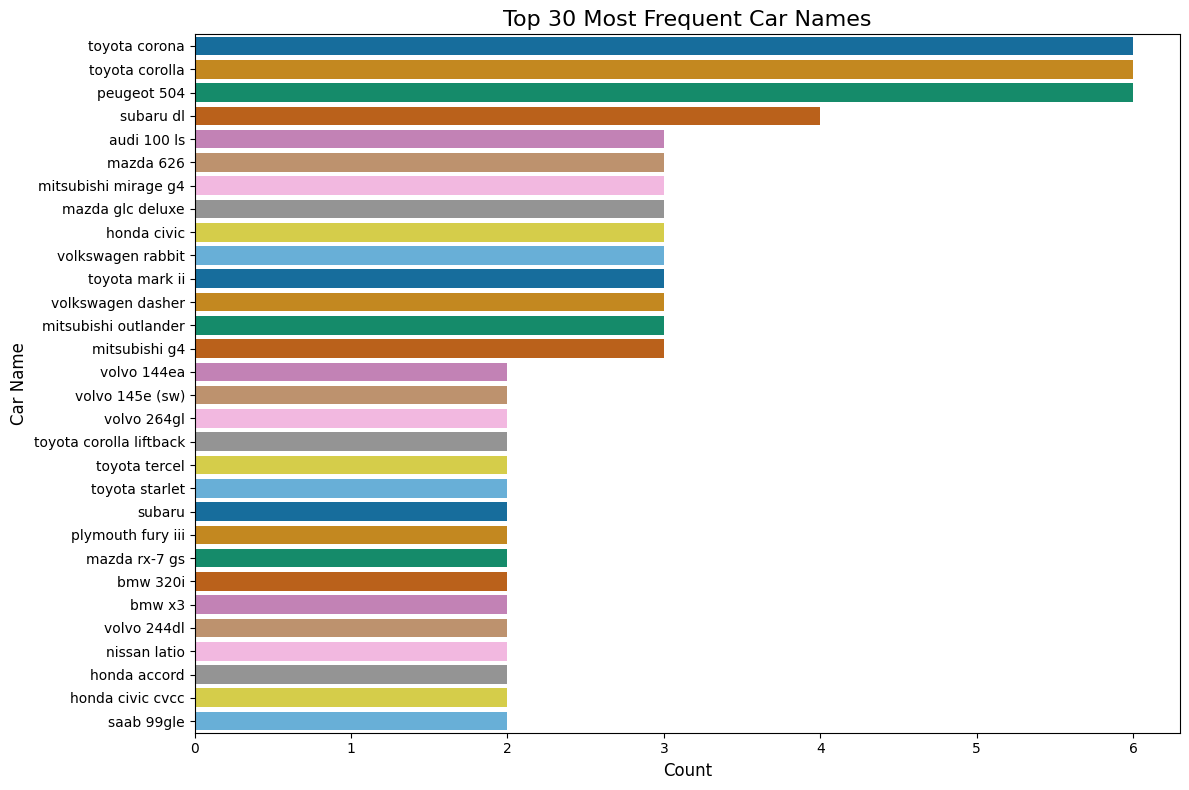

In [8]:
top_30 = df['CarName'].value_counts().nlargest(30)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_30.values, y=top_30.index, palette='colorblind')
plt.title('Top 30 Most Frequent Car Names', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Car Name', fontsize=12)
plt.tight_layout()
plt.show()

## Distribution of Car Prices

Let's visualize the distribution of the target variable (`price`) to understand its spread, skewness, and presence of outliers.

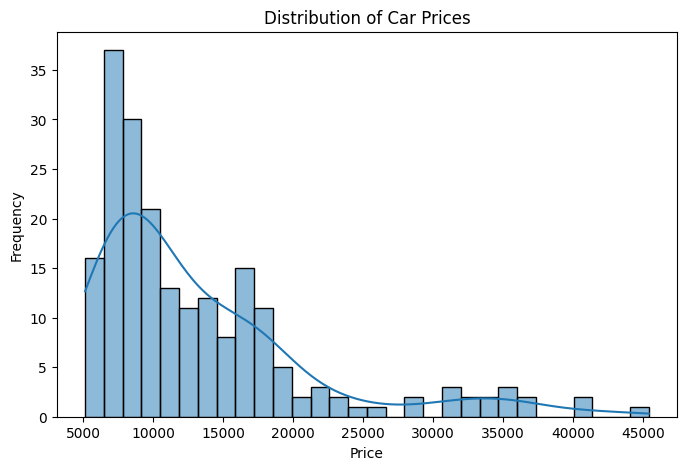

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Correlation Heatmap

A correlation heatmap helps us identify relationships between numerical features and the target variable. Strong correlations can guide feature selection and engineering.

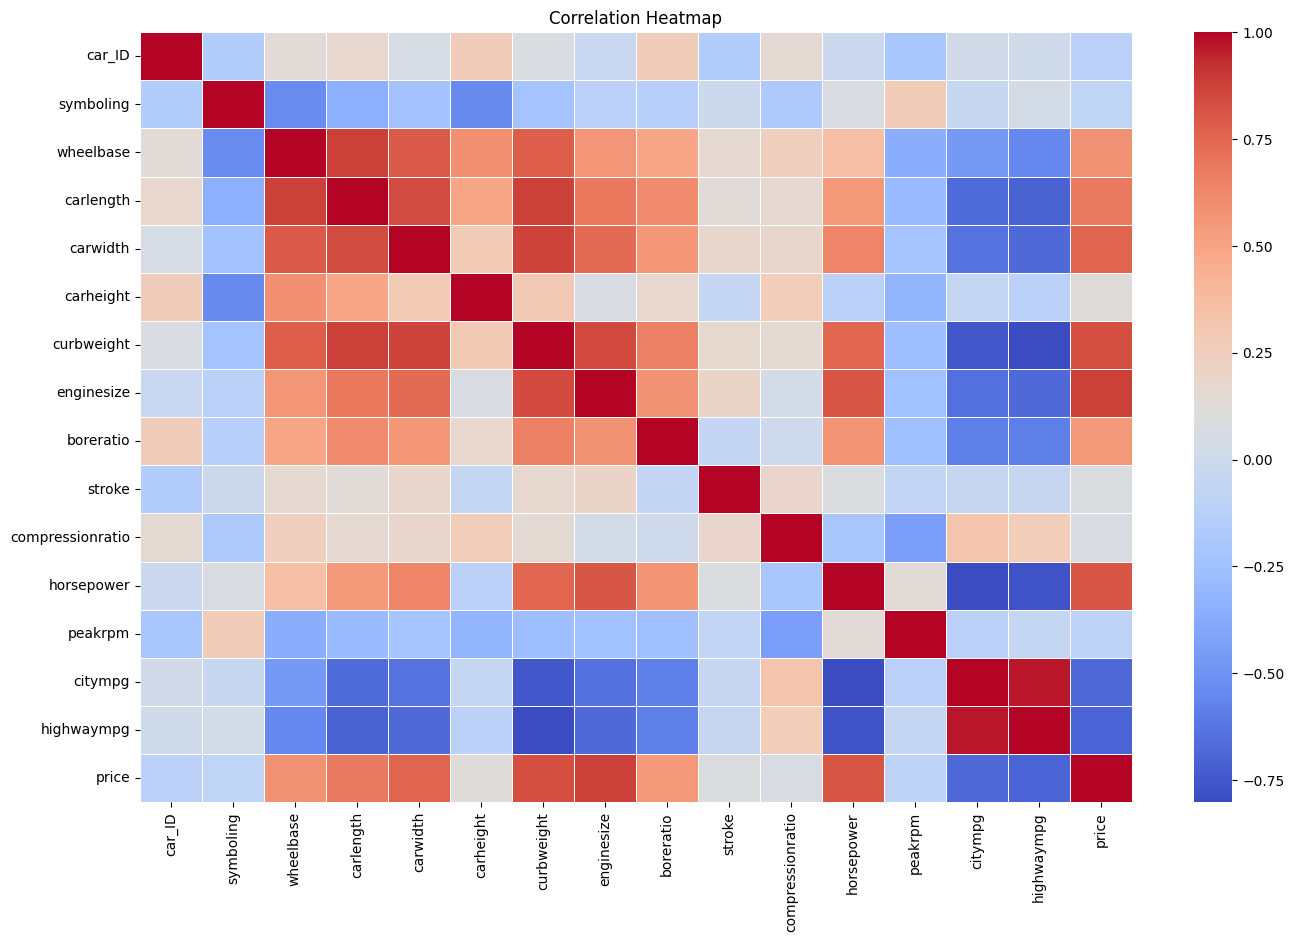

In [10]:
plt.figure(figsize=(16, 10))
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Boxplots for Numerical Features

Boxplots are useful for visualizing the spread and detecting outliers in numerical features. Let's plot boxplots for all numerical columns except the target.

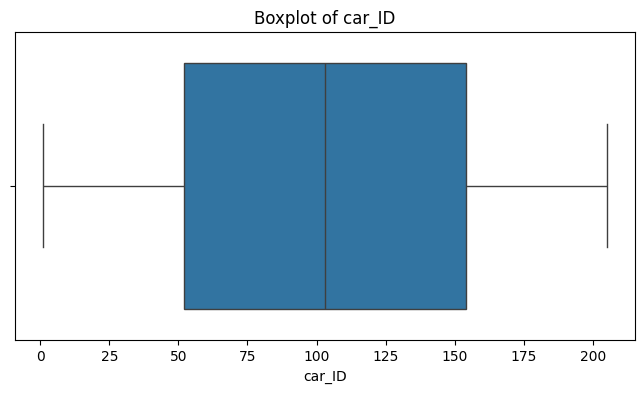

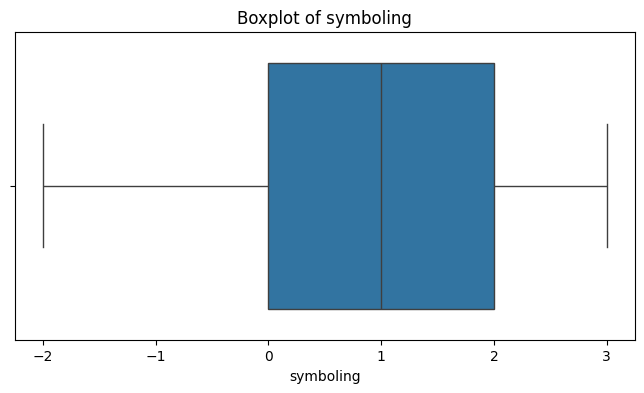

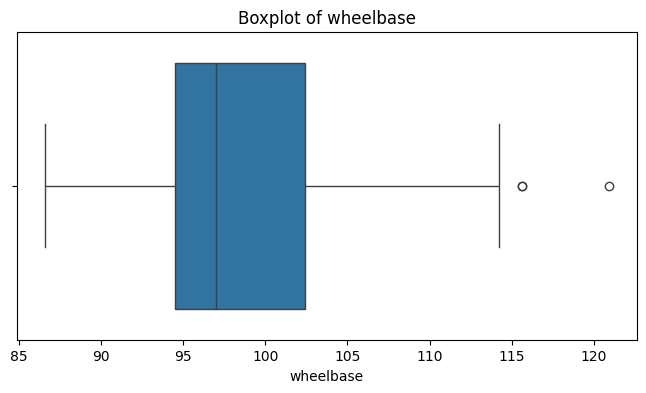

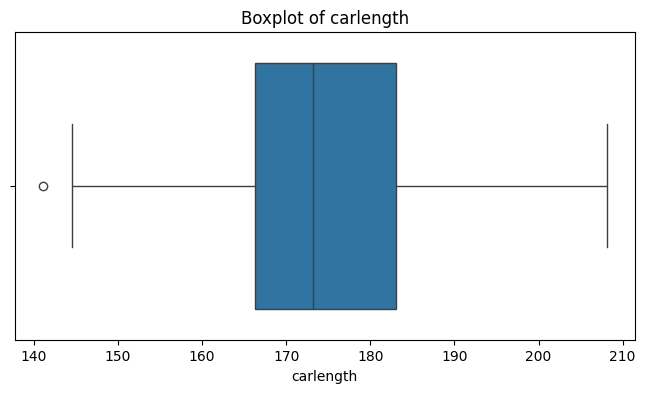

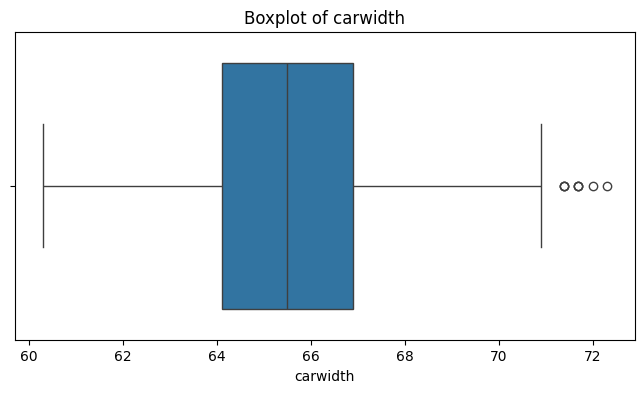

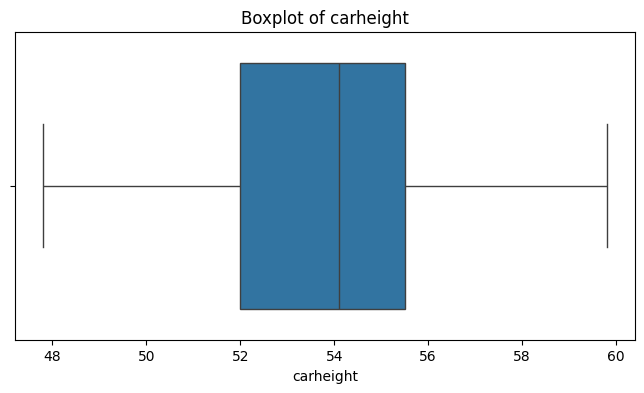

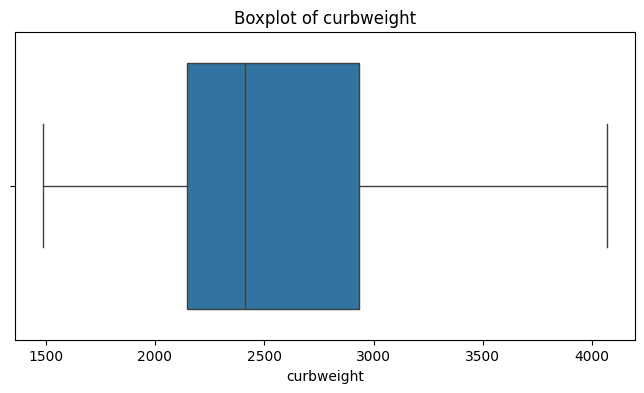

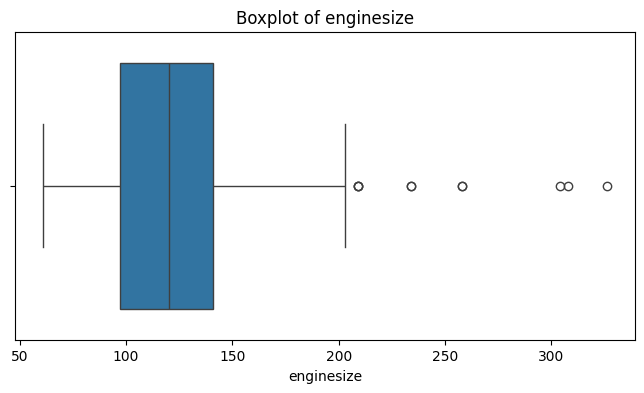

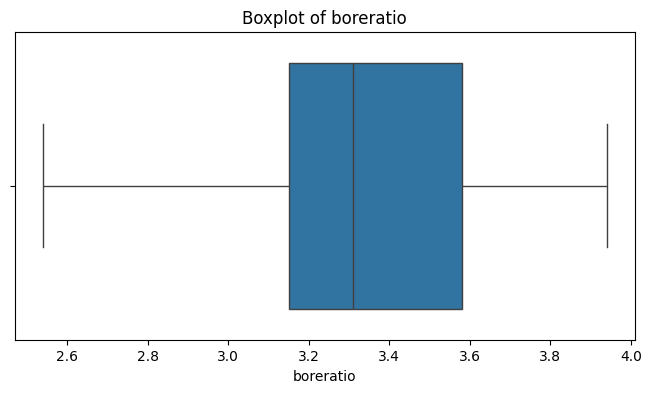

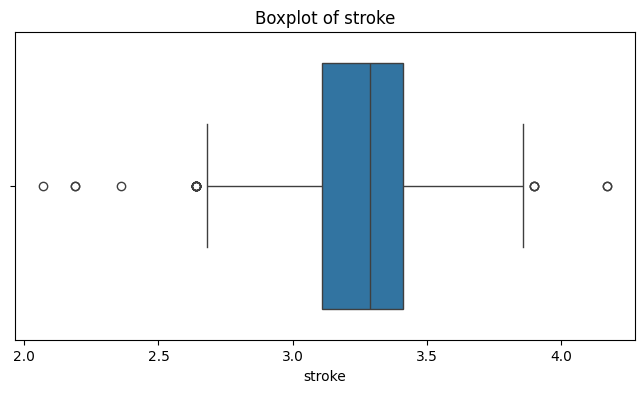

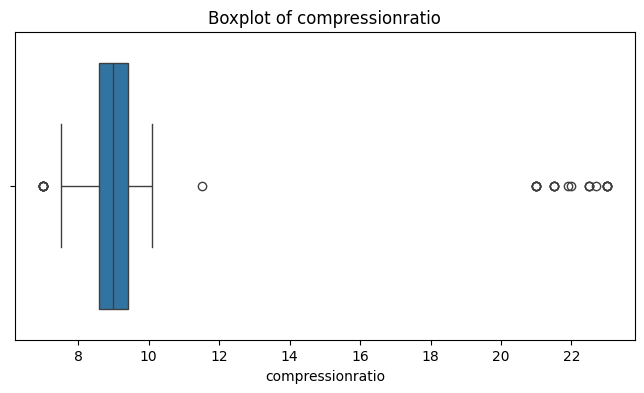

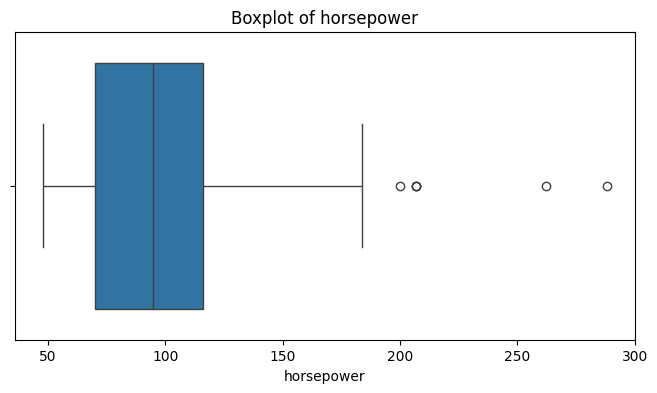

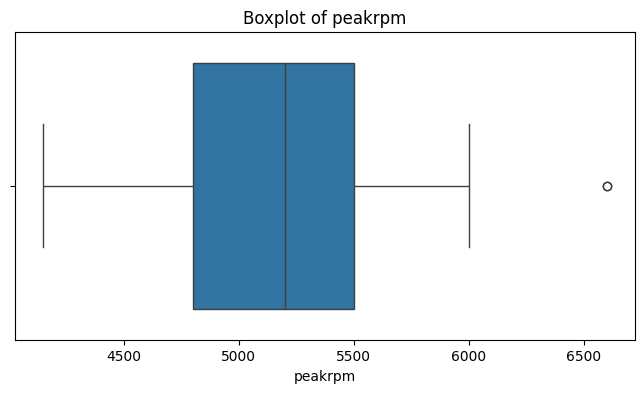

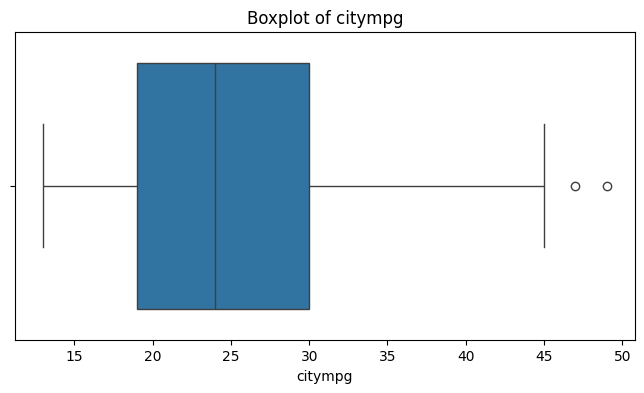

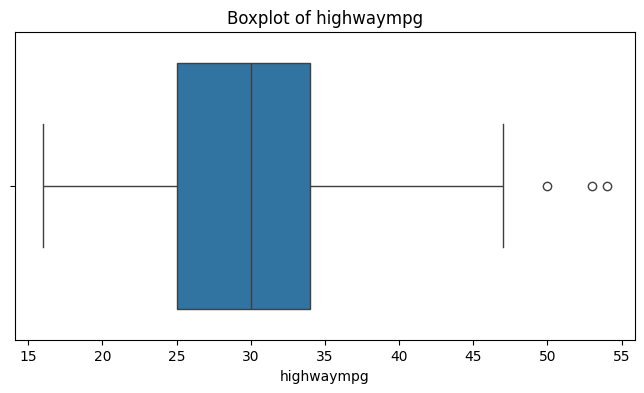

In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('price')  # Exclude target for now

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## Pairplot of Selected Features

Pairplots allow us to visualize pairwise relationships and distributions for selected features, including the target variable. This can reveal trends and potential linear/nonlinear relationships.

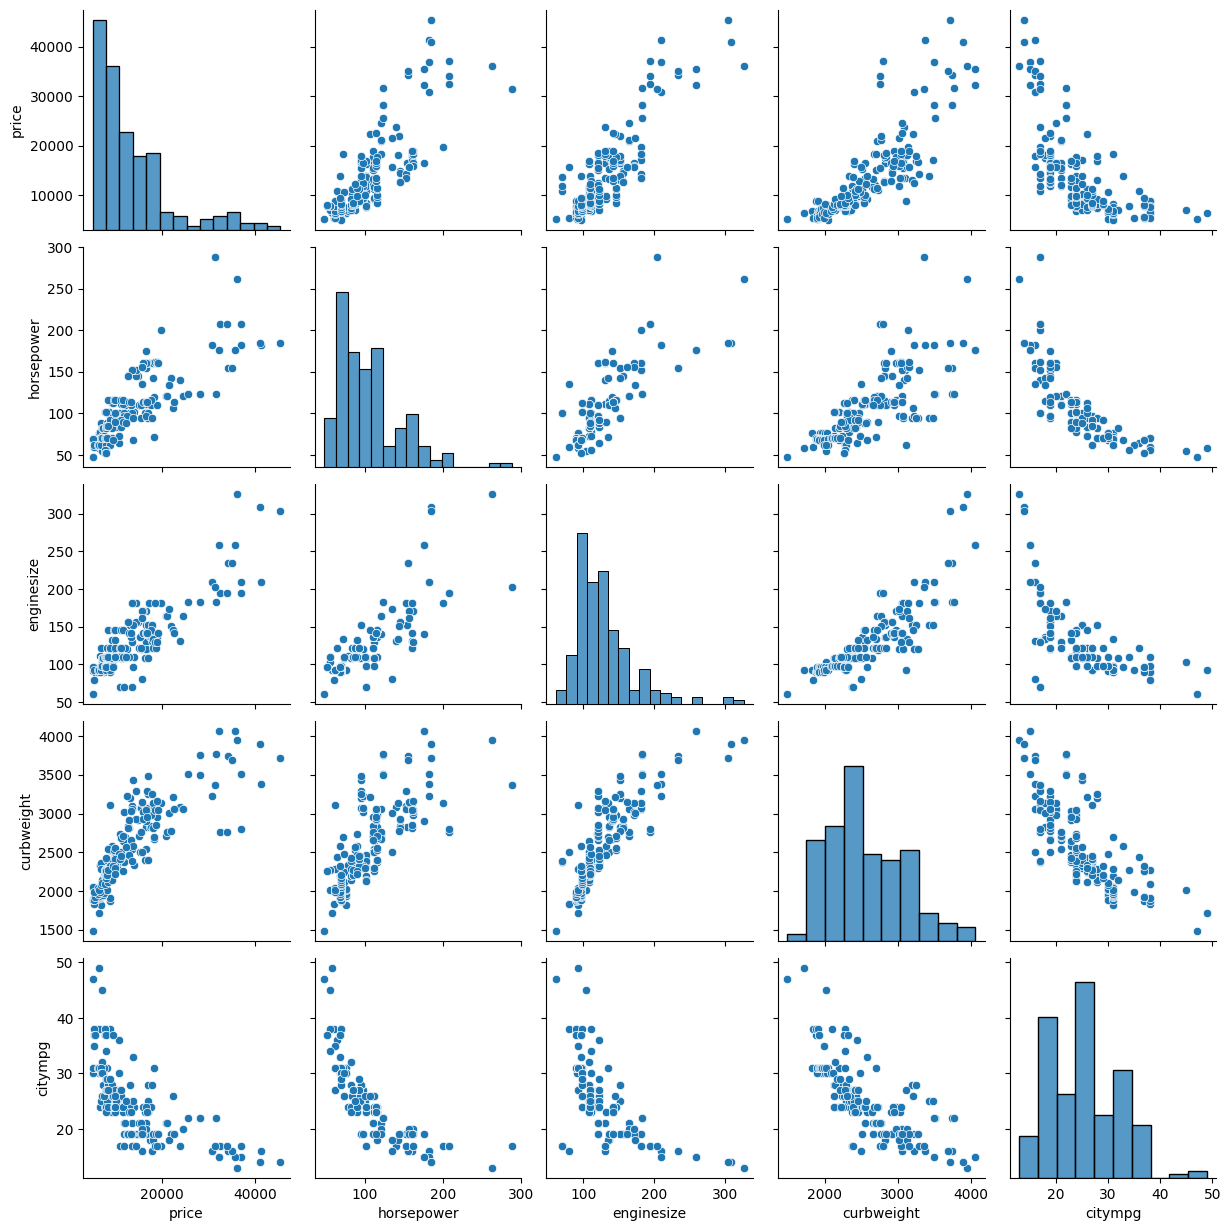

In [12]:
selected_cols = ['price', 'horsepower', 'enginesize', 'curbweight', 'citympg']
sns.pairplot(df[selected_cols])
plt.show()

## Count of Fuel Types

Let's see the distribution of cars by fuel type using a countplot. This helps us understand the balance of categories in this feature.

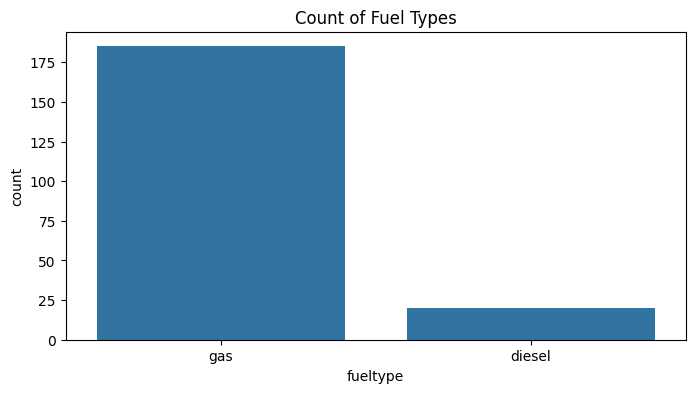

In [13]:
plt.figure(figsize=(8, 4))
sns.countplot(x='fueltype', data=df)
plt.title('Count of Fuel Types')
plt.show()

## Average Price by Car Body Type

We can use a barplot to compare the average car price across different car body types. This can reveal which types tend to be more expensive.

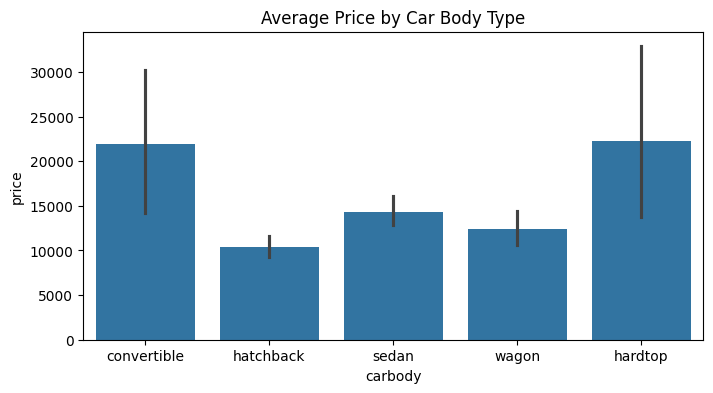

In [14]:
plt.figure(figsize=(8, 4))
sns.barplot(x='carbody', y='price', data=df)
plt.title('Average Price by Car Body Type')
plt.show()